# Statistical Error Analysis

In this notebook we will be examining error from a linear model using statistical methods.

## Mean

The mean describes the average value of a set of numbers:

\begin{equation*}
\bar{x} = \frac{1}{n}\sum^{n}_{i=1}x_i
\end{equation*}

Suppose we generate 100 random values distributed around y=8 and plot these on a graph. Lets also find the mean of the generated samples.

In [1]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
X = 2 * np.random.rand(100,1)
y = 8 + np.random.randn(100,1)

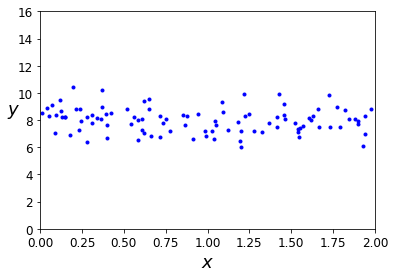

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 16])
plt.show()

In [4]:
y_mean = y.sum()/len(y)
y_mean

7.998919639832642

## Standard Deviation

Our data has a mean of 7.9989. One important statistic that can be useful to know on average how far from the mean each instance is. This can be calculated using the standard deviation:

\begin{equation*}
\sigma = \sqrt{\frac{1}{n}\sum^{n}_{i=1}(x_i-\bar{x})^2}
\end{equation*}

Here we implement it below:

In [6]:
y_std = np.sqrt(1/len(y)*np.sum((y-y_mean)**2))
y_std

0.9083532422630786

## Variance

Variance is defined as the square of the standard deviation and it places a larger emphasis on outliers. The variance is used to determine the total spread of data wheras the standard deviation measures the "local" spread for each instance.

## Standard error

We know that the true mean is 8 and the mean generated from these 100 samples is 7.9989. The question now is how accurate the mean $\hat{\mu}$ is to the actual $\mu$. Or more generally if we create a $\hat{\mu}$ from $n$ samples how precise is our mean?

This value is called the standard error and is predicted using the following formula:

\begin{equation*}
\text{Var}(\hat{\mu})= \text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n}
\end{equation*}

Note that the standard deviation is the standard deviation of the errors of y. Here we can see that with more samples (higher $n$) we have a smaller standard error and eventually the standard error will be zero according to the law of large numbers. Lets implement this on our data:

In [8]:
std_error = y_std**2/np.sqrt(len(y))
std_error

0.0825105612729847

## Standard Errors for Linear Regression

We can apply this knowledge to the simple linear regression coefficients using the following formulas:

\begin{equation*}
\text{SE}(\theta_0)^2=\sigma^2\Bigg\lbrack \frac{1}{n}+\frac{\bar{x}^2}{\Sigma^{n}_{i=1}(x-\bar{x})^2}\Bigg\rbrack
\end{equation*}

\begin{equation*}
\text{SE}(\theta_1)^2=\frac{\sigma^2}{\Sigma^{n}_{i=1}(x-\bar{x})^2}
\end{equation*}

Or to make it more compact using matrices:

\begin{equation*}
\text{Var}(\theta)=\sigma^2 (X^TX)^{-1}
\end{equation*}

However the equation above produces a variance/covariance matrix so to get the standard errors for the coefficients the square root of the diagonal needs to be taken. To estimate the standard deviation we can use the following formula:

\begin{equation*}
\sigma = \sqrt{\frac{1}{n-k}\sum^{n}_{i=1}(x_i-\bar{x})^2}
\end{equation*}

Where k is the number of parameters used for Bessel's correction. Here it is implemented:

In [10]:
np.random.seed(42)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #apply model and make predictions
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

X_b = np.c_[ np.ones(( 100, 1)), X] #add bias vector of 1s 

sigma_squared = 1/(len(y)-2)*((y-y_pred)**2).sum() #find standard deviation squared
var_cov_matrix = sigma_squared * np.linalg.inv(X_b.T.dot(X_b)) #create variance/covariance matrix
standard_errors = np.sqrt(np.diagonal(var_cov_matrix)) #get standard errors

standard_errors

array([0.1702866 , 0.15324729])

So our model coefficients have a standard error of around 0.16 which shows how accurate it thinks it could be to the actual line. Let's have a look at the coefficients:

In [13]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[4.21509616]
[[2.77011339]]


As we can see the actual error is 0.22 and 0.23 so our standard error wasn't far off!

## Confidence intervals

Using the standard error we can calculate confidence intervals. An example is for linear regressions the the 95% confidence interval for $\theta_0$ and $\theta_1$ takes the form:

\begin{equation*}
\hat{\theta}\pm 2\cdot \text{SE}(\hat{\theta})
\end{equation*}

This can be interpreted as a 95% chance that this confidence interval contains the best thetas for this linear regression.

# Assesing fit of a Simple Linear Regression

## Residual Standard Error

The residual standard error is a bit like the standard deviation and determines how far off a linear model is on average from it's estimates. Here is the formula:

\begin{equation*}
\text{RSE} = \sqrt{\frac{1}{n-k}\sum^{n}_{i=1}(y-\hat{y})^2}
\end{equation*}

Here we apply it:

In [15]:
RSE = np.sqrt(1/(len(y)-2)*((y-y_pred)**2).sum())
RSE

0.9072185367571413

## $R^2$ statistic

The RSE looks at the total error whereas the $R^2$ looks at the error relative to the proportion of variance. The formula takes the *residual sum of squares* and divides it by the *total sum of squares*. It is also subtracted from 1 to make it simpler to understand:

\begin{equation*}
R^2 = 1-\frac{\text{RSS}}{\text{TSS}}
\end{equation*}

Lets find the $R^2$:

In [17]:
RSS = ((y-y_pred)**2).sum()
TSS = (y-(y-y_pred).mean()).sum()
R_squared = 1 - RSS/TSS
R_squared

0.8817325397275051